In [1]:
import os
import re
import csv
import numpy as np


In [2]:
cwd = os.getcwd()

# preapre CSV

In [3]:
results_path = "/Users/u7826985/Projects/Nvidia/results/2025_10_10_vector_length_comparison"
AA_folder ="100taxa_diff_trees_1M_sites_AA"
DNA_folder ="100taxa_diff_trees_1M_sites"

In [4]:
output_csv = f"{results_path}/results.csv"
output_csv_aa = f"{results_path}/results_aa.csv"

In [5]:
# Regex to capture the RESULT line
pattern = re.compile(
    r"\[RESULT\]\s*backend=(\w+)\s+taxa=(\d+)\s+sites=(\d+)\s+patterns=(\d+)\s+time=([\d\.e\+\-]+)s\s+likelihood=([\-.\deE]+)"
)


In [6]:
data = []

In [7]:
#read files in results_path

def read_files_in_directory(directory, unique_name=""):
    for i in range(1, 11):
        tree_folder = f"{directory}/tree_{i}"
        files = os.listdir(tree_folder)
        for file in files:
            if file.endswith('.txt'):
                print(f"Reading file: {file}")
                with open(f'{tree_folder}/{file}', 'r') as f:
                    #get treefile name from the txt file name
                    tree_file_name = file.split("_")[4] + "_" + file.split("_")[5]
                    run_number = file.split("_")[3]
                    
                 
                        
                    for line in f:
                        match = pattern.search(line)
                        if match:
                            backend, taxa, sites, patterns, time, likelihood = match.groups()
                            backend = file.split("_")[1] + "_" + file.split("_")[2]
                                
                            if taxa != "100":
                                continue
                            backend += unique_name
                            data.append([backend, taxa, sites, patterns, likelihood, time, tree_file_name, run_number])
    
                            # Write to CSV
                            # with open(output_csv, 'w', newline='') as csvfile:
                            #     writer = csv.writer(csvfile)
                            #     writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time"])
                            #     writer.writerows(data)

    print(f"Extracted {len(data)} results to {output_csv}")



In [8]:
read_files_in_directory(f"{results_path}/{DNA_folder}")

Reading file: output_vector_64_run3_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_vector_default_run7_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_vector_32_run10_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_vector_32_run6_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_vector_128_run3_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_vector_256_run1_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_vector_32_run9_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_vector_512_run1_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_vector_default_run8_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_vector_1024_run5_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_vector_256_run10_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_vector_1024_run9_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_vector_32_run5_tree_1_1000000_dna_openacc_v100.txt
Reading file: output_vector_default_run4_tre

In [9]:
print(data)

[['vector_64', '100', '1000000', '1000000', '-70051678.096398830413818', '1.072105737000000', 'tree_1', 'run3'], ['vector_default', '100', '1000000', '1000000', '-70051678.096398830413818', '1.097012522000000', 'tree_1', 'run7'], ['vector_32', '100', '1000000', '1000000', '-70051678.096398830413818', '1.130122293000000', 'tree_1', 'run10'], ['vector_32', '100', '1000000', '1000000', '-70051678.096398830413818', '1.134327894000000', 'tree_1', 'run6'], ['vector_128', '100', '1000000', '1000000', '-70051678.096398830413818', '1.060732554000000', 'tree_1', 'run3'], ['vector_256', '100', '1000000', '1000000', '-70051678.096398830413818', '1.134585996000000', 'tree_1', 'run1'], ['vector_32', '100', '1000000', '1000000', '-70051678.096398830413818', '1.107338891000000', 'tree_1', 'run9'], ['vector_512', '100', '1000000', '1000000', '-70051678.096398830413818', '1.158694706000000', 'tree_1', 'run1'], ['vector_default', '100', '1000000', '1000000', '-70051678.096398830413818', '1.11814099000000

In [10]:
# read_iqtree_results(iqtree_results_path)

In [11]:
print(data)

[['vector_64', '100', '1000000', '1000000', '-70051678.096398830413818', '1.072105737000000', 'tree_1', 'run3'], ['vector_default', '100', '1000000', '1000000', '-70051678.096398830413818', '1.097012522000000', 'tree_1', 'run7'], ['vector_32', '100', '1000000', '1000000', '-70051678.096398830413818', '1.130122293000000', 'tree_1', 'run10'], ['vector_32', '100', '1000000', '1000000', '-70051678.096398830413818', '1.134327894000000', 'tree_1', 'run6'], ['vector_128', '100', '1000000', '1000000', '-70051678.096398830413818', '1.060732554000000', 'tree_1', 'run3'], ['vector_256', '100', '1000000', '1000000', '-70051678.096398830413818', '1.134585996000000', 'tree_1', 'run1'], ['vector_32', '100', '1000000', '1000000', '-70051678.096398830413818', '1.107338891000000', 'tree_1', 'run9'], ['vector_512', '100', '1000000', '1000000', '-70051678.096398830413818', '1.158694706000000', 'tree_1', 'run1'], ['vector_default', '100', '1000000', '1000000', '-70051678.096398830413818', '1.11814099000000

In [12]:
# Write to CSV

def write_to_csv(data, output_csv):
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time","treefile", "run_number"])
        writer.writerows(data)
        
        
write_to_csv(data, output_csv)

# Analysis of Results

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
# Read the CSV file into a DataFrame
df = pd.read_csv(output_csv)
# Display the first few rows of the DataFrame
df.head()

,backend,taxa,sites,patterns,likelihood,time,treefile,run_number
0,vector_64,100,1000000,1000000,-7.005168e+07,1.072106,tree_1,run3
1,vector_default,100,1000000,1000000,-7.005168e+07,1.097013,tree_1,run7
2,vector_32,100,1000000,1000000,-7.005168e+07,1.130122,tree_1,run10
3,vector_32,100,1000000,1000000,-7.005168e+07,1.134328,tree_1,run6
4,vector_128,100,1000000,1000000,-7.005168e+07,1.060733,tree_1,run3


In [15]:
df

,backend,taxa,sites,patterns,likelihood,time,treefile,run_number
0,vector_64,100,1000000,1000000,-7.005168e+07,1.072106,tree_1,run3
1,vector_default,100,1000000,1000000,-7.005168e+07,1.097013,tree_1,run7
2,vector_32,100,1000000,1000000,-7.005168e+07,1.130122,tree_1,run10
3,vector_32,100,1000000,1000000,-7.005168e+07,1.134328,tree_1,run6
4,vector_128,100,1000000,1000000,-7.005168e+07,1.060733,tree_1,run3
...,...,...,...,...,...,...,...,...
695,vector_256,100,1000000,1000000,-6.804077e+07,1.014245,tree_10,run6
696,vector_512,100,1000000,1000000,-6.804077e+07,1.106370,tree_10,run10
697,vector_512,100,1000000,1000000,-6.804077e+07,1.144196,tree_10,run8
698,vector_32,100,1000000,1000000,-6.804077e+07,1.165443,tree_10,run1


In [16]:
# groups = df.groupby('treefile')

In [17]:
def plot_average_time_per_backend(df, logy=False, path=""):
    groups = df.groupby(['treefile', 'backend'])
    mean_times = groups['time'].mean().unstack()
    mean_times.plot(kind='bar', figsize=(10, 5))
    if logy:
        plt.yscale('log')
    plt.xlabel('Tree File')
    plt.ylabel('Average Time (s)')
    plt.title('Average Time per Backend for Each Tree File')
    plt.tight_layout()
    if path:
        plt.savefig(path)
    plt.show()


def plot_boxplot_time_per_backend(df, logy=False, path=""):
    plt.figure(figsize=(10, 5))
    df.boxplot(column='time', by='backend')
    if logy:
        plt.yscale('log')
    plt.xlabel('Backend')
    plt.ylabel('Time (s)')
    plt.title('Time Distribution per Backend')
    plt.suptitle('')
    plt.tight_layout()
    if path:
        plt.savefig(path)
    plt.show()
    
def boxplot_per_tree_group_backend(df):
    # plot per tree file boxplot grouped by backend
    tree_files = df['treefile'].unique()
    for tree_file in tree_files:
        plt.figure(figsize=(10, 5))
        df_tree = df[df['treefile'] == tree_file]
        df_tree.boxplot(column='time', by='backend')
        plt.xlabel('Backend')
        plt.ylabel('Time (s)')
        plt.title(f'Time Distribution per Backend for {tree_file}')
        plt.suptitle('')
        plt.tight_layout()
        plt.show()

In [18]:
df

,backend,taxa,sites,patterns,likelihood,time,treefile,run_number
0,vector_64,100,1000000,1000000,-7.005168e+07,1.072106,tree_1,run3
1,vector_default,100,1000000,1000000,-7.005168e+07,1.097013,tree_1,run7
2,vector_32,100,1000000,1000000,-7.005168e+07,1.130122,tree_1,run10
3,vector_32,100,1000000,1000000,-7.005168e+07,1.134328,tree_1,run6
4,vector_128,100,1000000,1000000,-7.005168e+07,1.060733,tree_1,run3
...,...,...,...,...,...,...,...,...
695,vector_256,100,1000000,1000000,-6.804077e+07,1.014245,tree_10,run6
696,vector_512,100,1000000,1000000,-6.804077e+07,1.106370,tree_10,run10
697,vector_512,100,1000000,1000000,-6.804077e+07,1.144196,tree_10,run8
698,vector_32,100,1000000,1000000,-6.804077e+07,1.165443,tree_10,run1


In [19]:
#show vector_128 only
df[df['backend'].str.contains('vector_128')]

,backend,taxa,sites,patterns,likelihood,time,treefile,run_number
4,vector_128,100,1000000,1000000,-7.005168e+07,1.060733,tree_1,run3
22,vector_128,100,1000000,1000000,-7.005168e+07,1.074611,tree_1,run5
28,vector_128,100,1000000,1000000,-7.005168e+07,1.048951,tree_1,run9
32,vector_128,100,1000000,1000000,-7.005168e+07,1.055376,tree_1,run6
36,vector_128,100,1000000,1000000,-7.005168e+07,1.063511,tree_1,run10
...,...,...,...,...,...,...,...,...
667,vector_128,100,1000000,1000000,-6.804077e+07,1.101284,tree_10,run3
678,vector_128,100,1000000,1000000,-6.804077e+07,1.082948,tree_10,run5
680,vector_128,100,1000000,1000000,-6.804077e+07,1.042660,tree_10,run2
686,vector_128,100,1000000,1000000,-6.804077e+07,1.102958,tree_10,run8


<Figure size 1000x500 with 0 Axes>

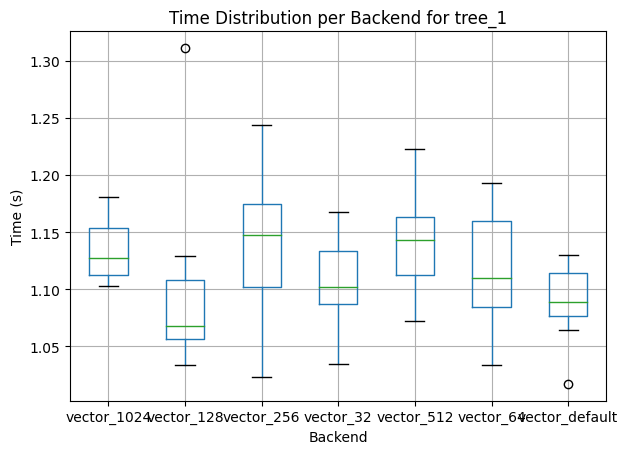

<Figure size 1000x500 with 0 Axes>

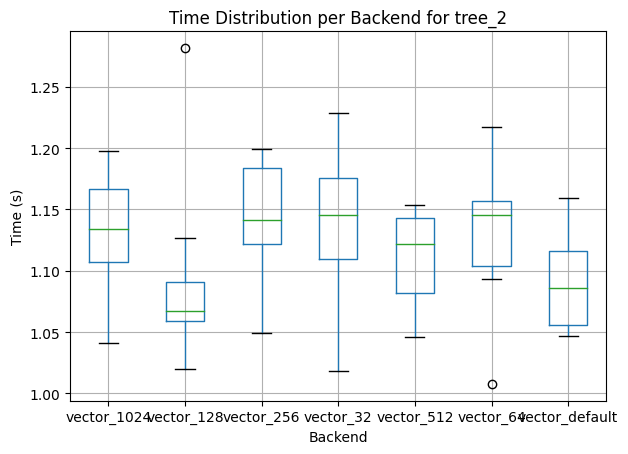

<Figure size 1000x500 with 0 Axes>

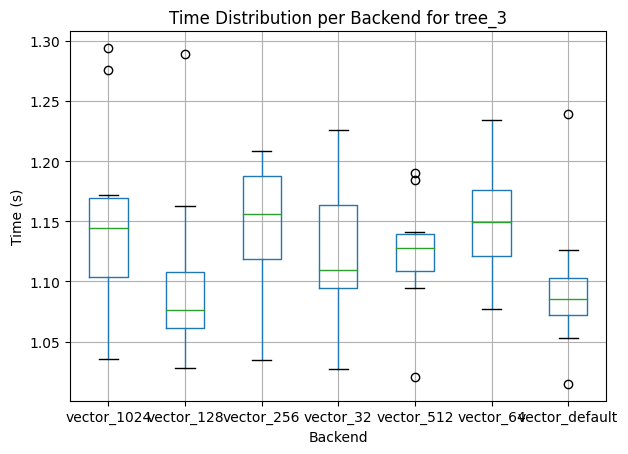

<Figure size 1000x500 with 0 Axes>

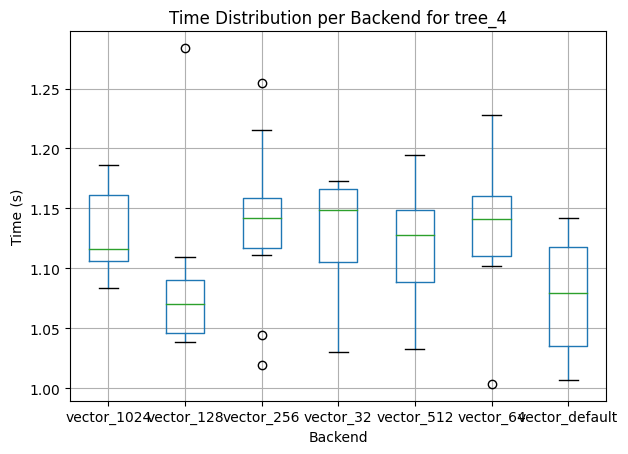

<Figure size 1000x500 with 0 Axes>

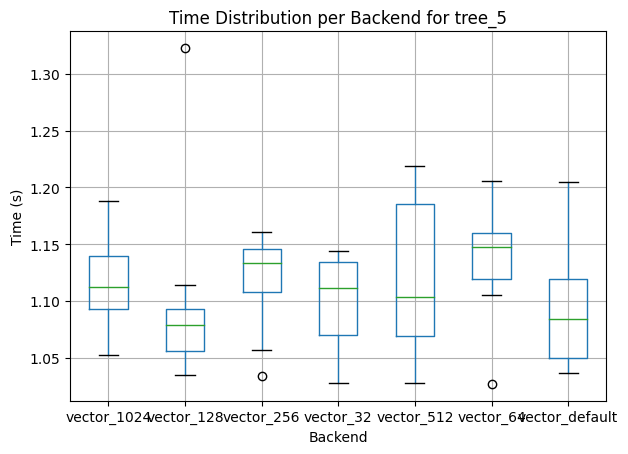

<Figure size 1000x500 with 0 Axes>

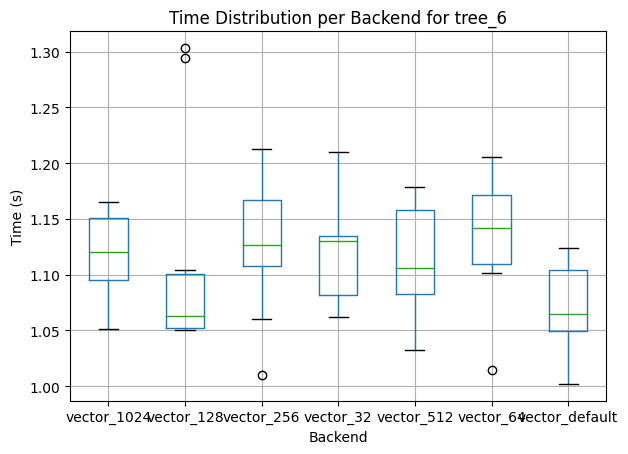

<Figure size 1000x500 with 0 Axes>

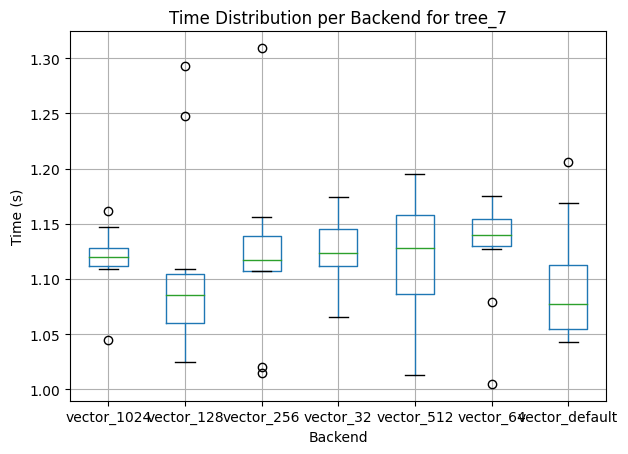

<Figure size 1000x500 with 0 Axes>

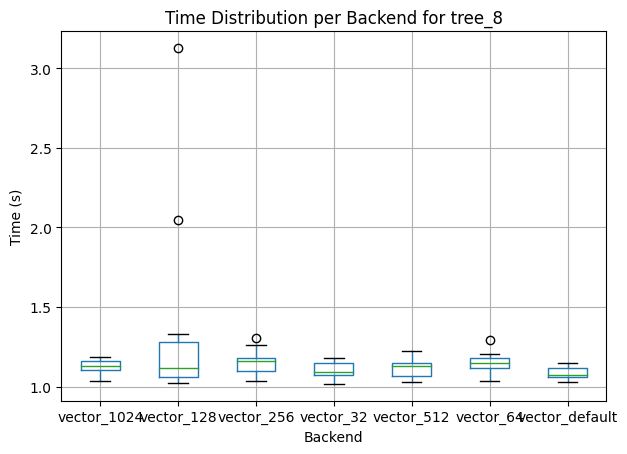

<Figure size 1000x500 with 0 Axes>

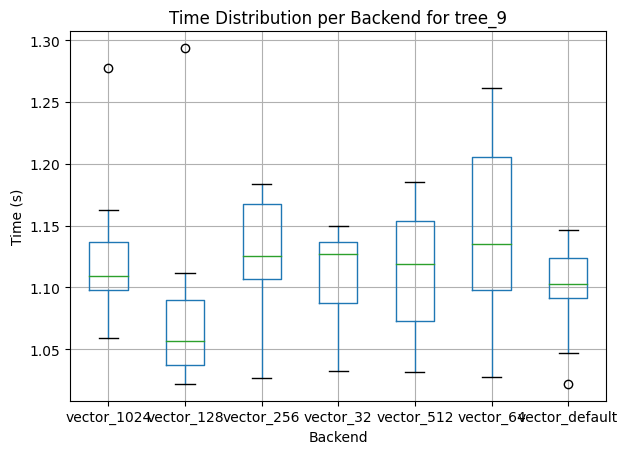

<Figure size 1000x500 with 0 Axes>

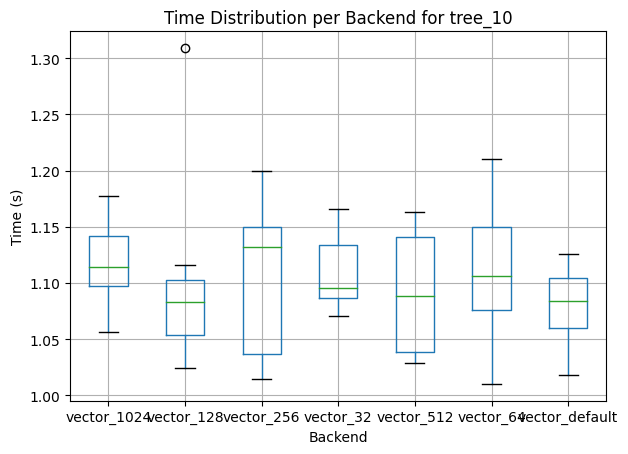

In [20]:
boxplot_per_tree_group_backend(df)

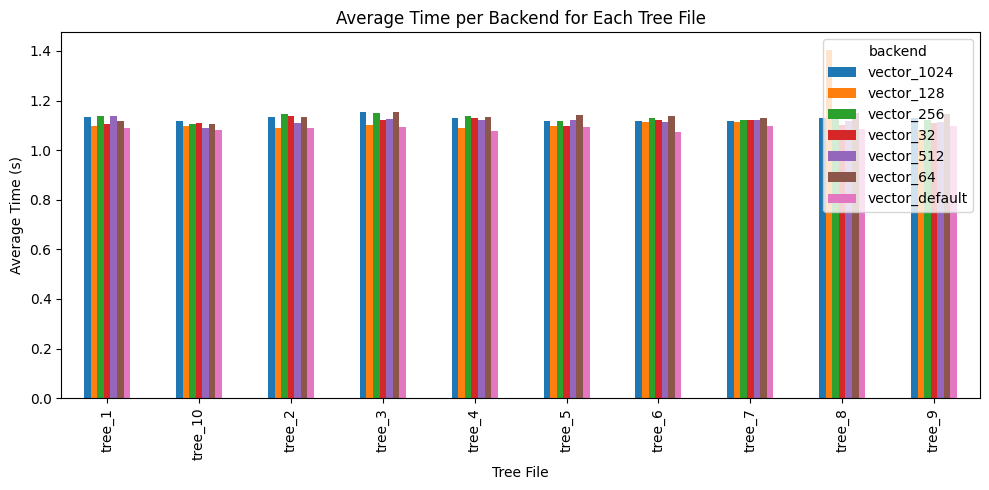

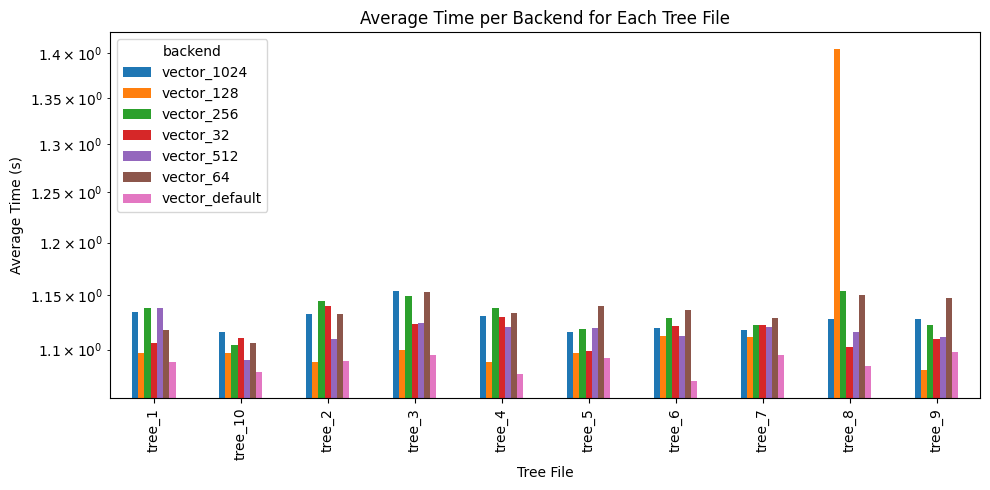

<Figure size 1000x500 with 0 Axes>

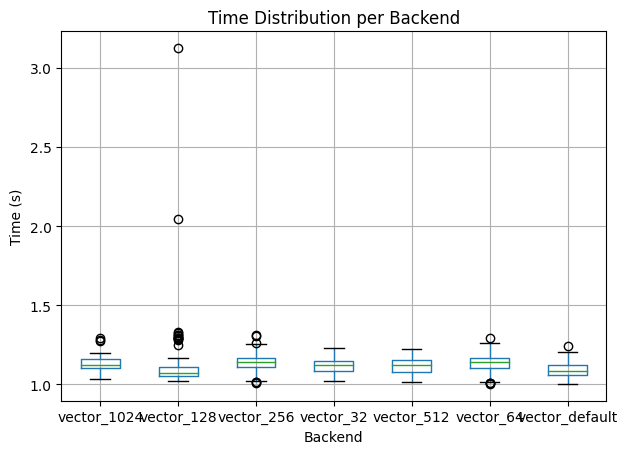

In [21]:

plot_average_time_per_backend(df, path=f"{cwd}/average_time_per_backend.png")

plot_average_time_per_backend(df, logy=True, path=f"{cwd}/average_time_per_backend_logy.png")

plot_boxplot_time_per_backend(df, path=f"{cwd}/boxplot_time_per_backend.png")

In [22]:
data = []

read_files_in_directory(f"{results_path}/{AA_folder}")


data

Reading file: output_vector_32_run6_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_vector_256_run2_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_vector_256_run9_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_vector_512_run8_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_vector_1024_run10_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_vector_1024_run3_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_vector_512_run3_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_vector_1024_run8_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_vector_64_run3_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_vector_64_run8_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_vector_128_run7_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_vector_default_run9_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_vector_default_run2_tree_1_1000000_aa_openacc_v100.txt
Reading file: output_vector_default_run4_tree_1_1000000

[['vector_32',
  '100',
  '1000000',
  '1000000',
  '-110413195.778517276048660',
  '1.331265001000000',
  'tree_1',
  'run6'],
 ['vector_256',
  '100',
  '1000000',
  '1000000',
  '-110413195.778517276048660',
  '1.200506734000000',
  'tree_1',
  'run2'],
 ['vector_256',
  '100',
  '1000000',
  '1000000',
  '-110413195.778517276048660',
  '1.245339750000000',
  'tree_1',
  'run9'],
 ['vector_512',
  '100',
  '1000000',
  '1000000',
  '-110413195.778517276048660',
  '1.375210069000000',
  'tree_1',
  'run8'],
 ['vector_1024',
  '100',
  '1000000',
  '1000000',
  '-110413195.778517276048660',
  '1.244639409000000',
  'tree_1',
  'run10'],
 ['vector_1024',
  '100',
  '1000000',
  '1000000',
  '-110413195.778517276048660',
  '1.271643796000000',
  'tree_1',
  'run3'],
 ['vector_512',
  '100',
  '1000000',
  '1000000',
  '-110413195.778517276048660',
  '1.315777526000000',
  'tree_1',
  'run3'],
 ['vector_1024',
  '100',
  '1000000',
  '1000000',
  '-110413195.778517276048660',
  '1.255339

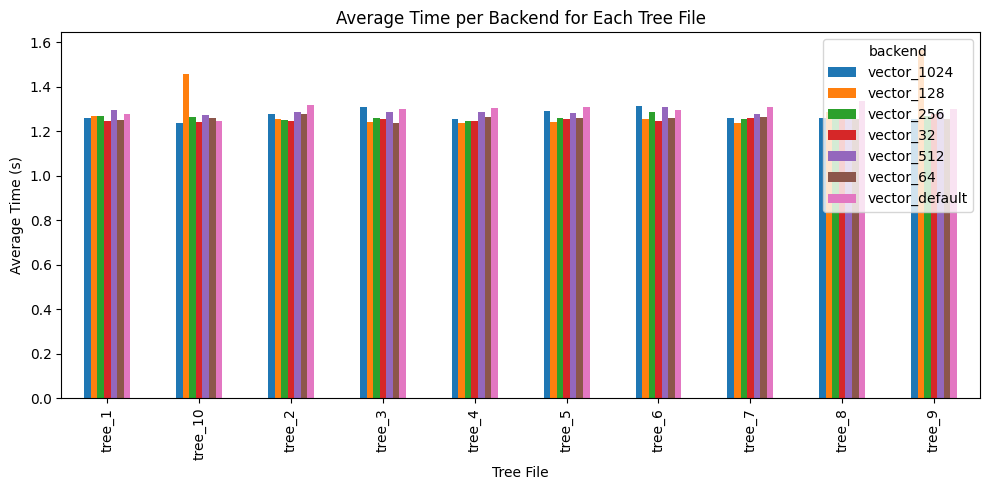

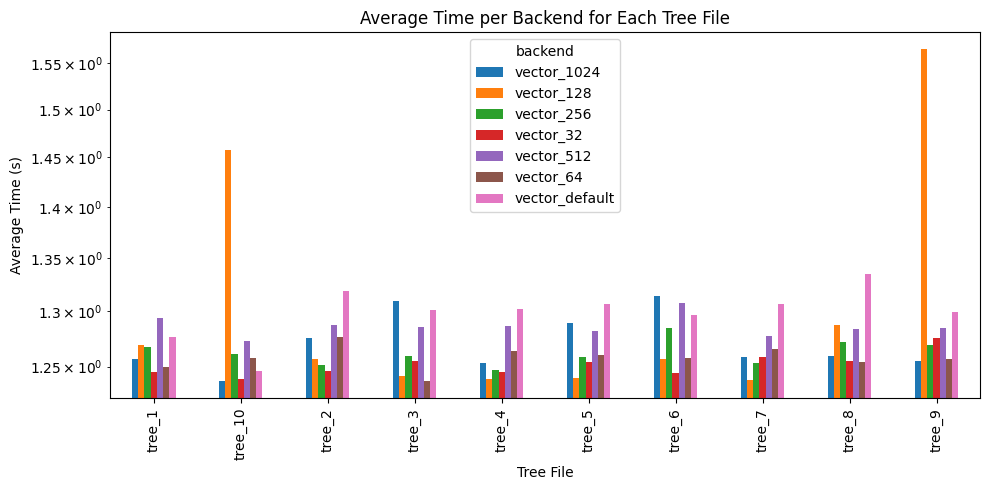

<Figure size 1000x500 with 0 Axes>

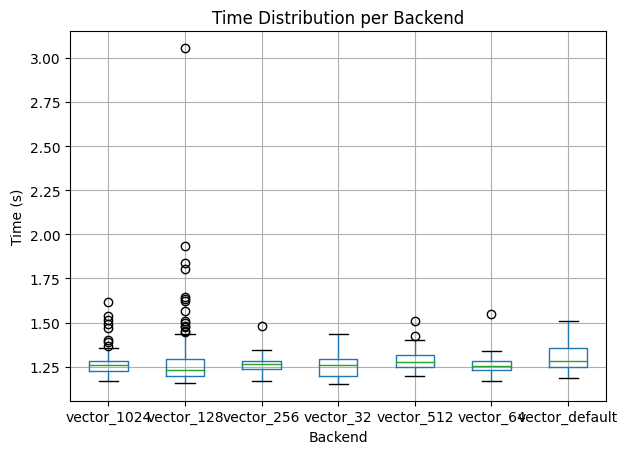

In [23]:
write_to_csv(data, output_csv_aa)
df_aa = pd.read_csv(output_csv_aa)


plot_average_time_per_backend(df_aa, path=f"{cwd}/average_time_per_backend_aa.png")

plot_average_time_per_backend(df_aa, logy=True, path=f"{cwd}/average_time_per_backend_logy_aa.png")

plot_boxplot_time_per_backend(df_aa, path=f"{cwd}/boxplot_time_per_backend_aa.png")

<Figure size 1000x500 with 0 Axes>

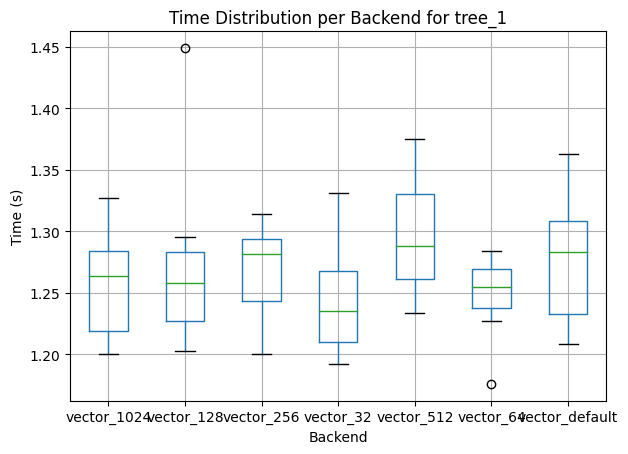

<Figure size 1000x500 with 0 Axes>

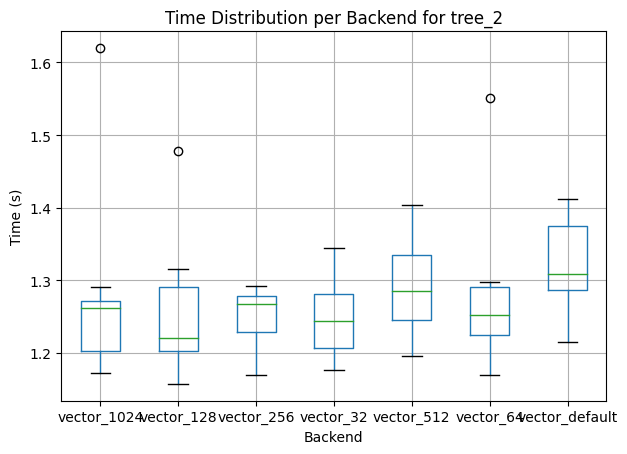

<Figure size 1000x500 with 0 Axes>

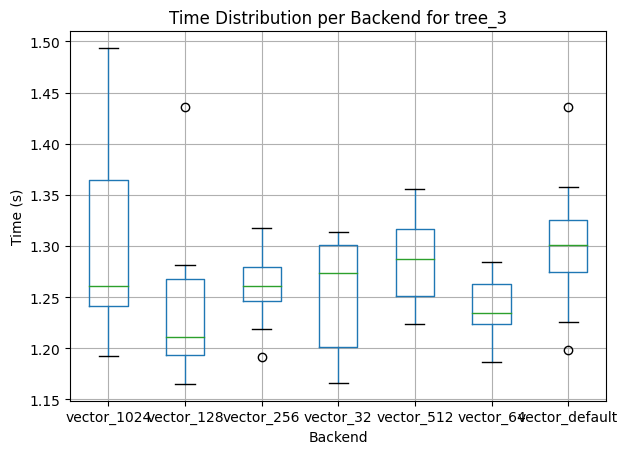

<Figure size 1000x500 with 0 Axes>

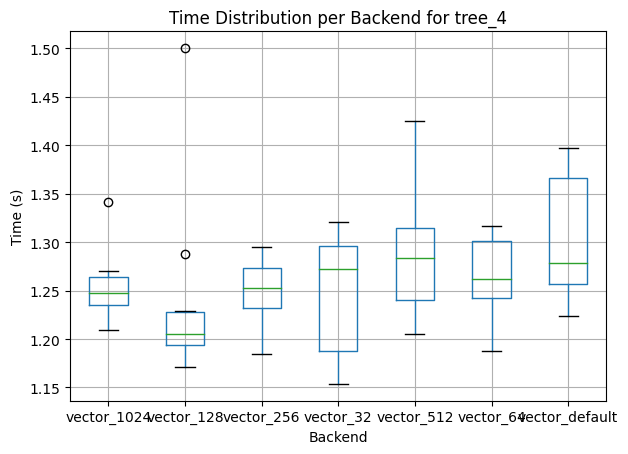

<Figure size 1000x500 with 0 Axes>

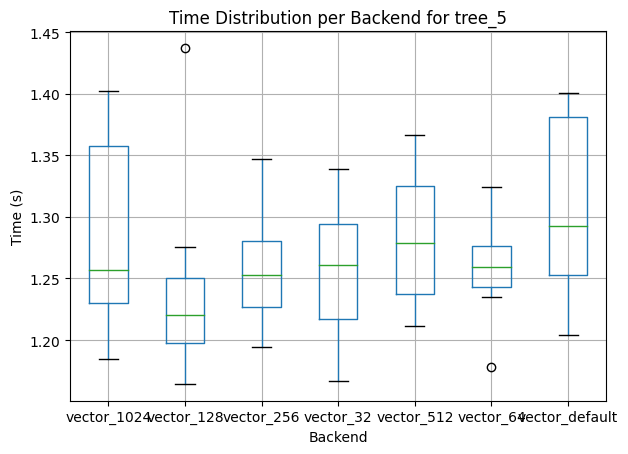

<Figure size 1000x500 with 0 Axes>

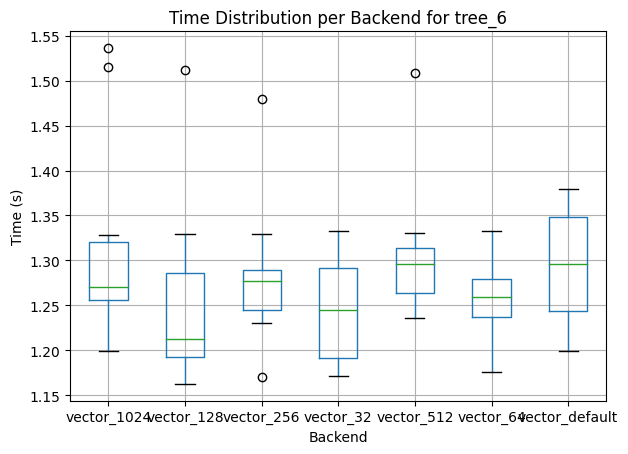

<Figure size 1000x500 with 0 Axes>

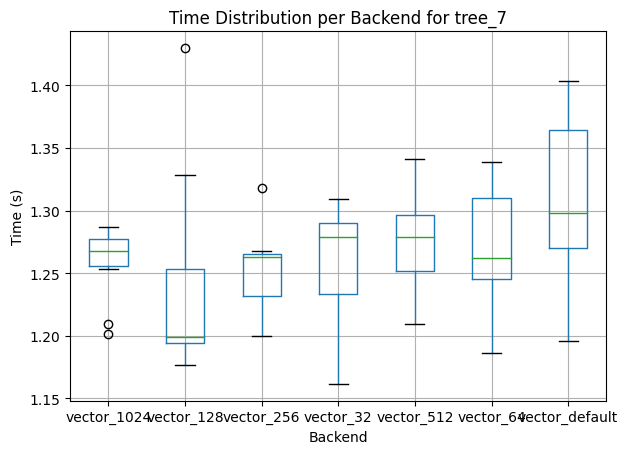

<Figure size 1000x500 with 0 Axes>

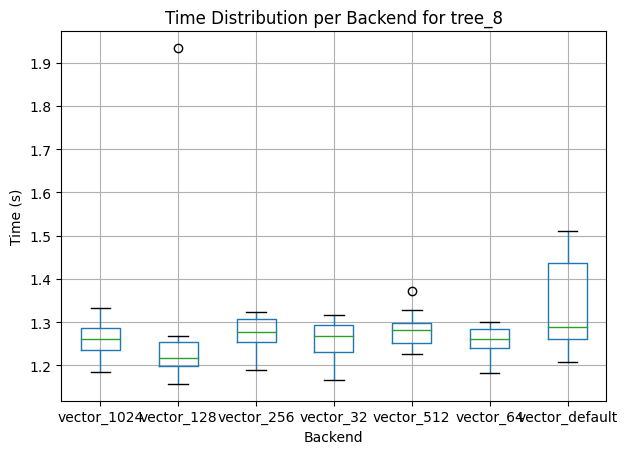

<Figure size 1000x500 with 0 Axes>

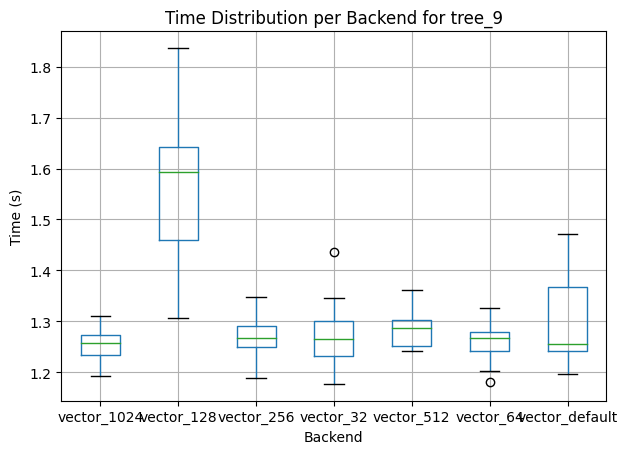

<Figure size 1000x500 with 0 Axes>

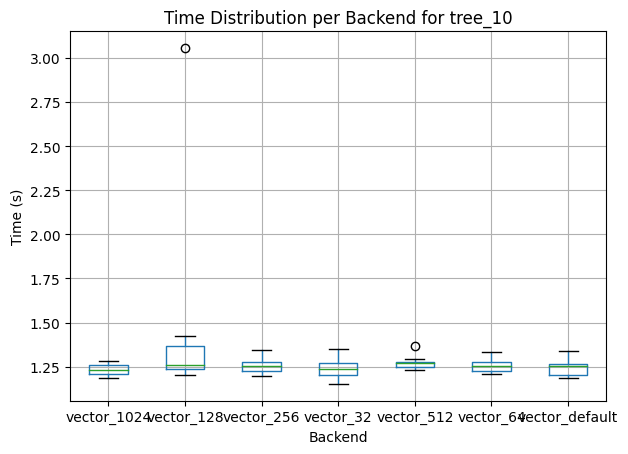

In [24]:
boxplot_per_tree_group_backend(df_aa)